<a href="https://colab.research.google.com/github/Mrshreesharma/EDA-on-different-datasets-/blob/main/eda_on_netflix_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# EDA on NETFLIX DATASET.



In [30]:
import pandas as pd 
import numpy as np 
import plotly
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb 
%matplotlib inline

In [7]:
netflix_df = pd.read_csv('netflix_titles.csv')

In [15]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [11]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [13]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

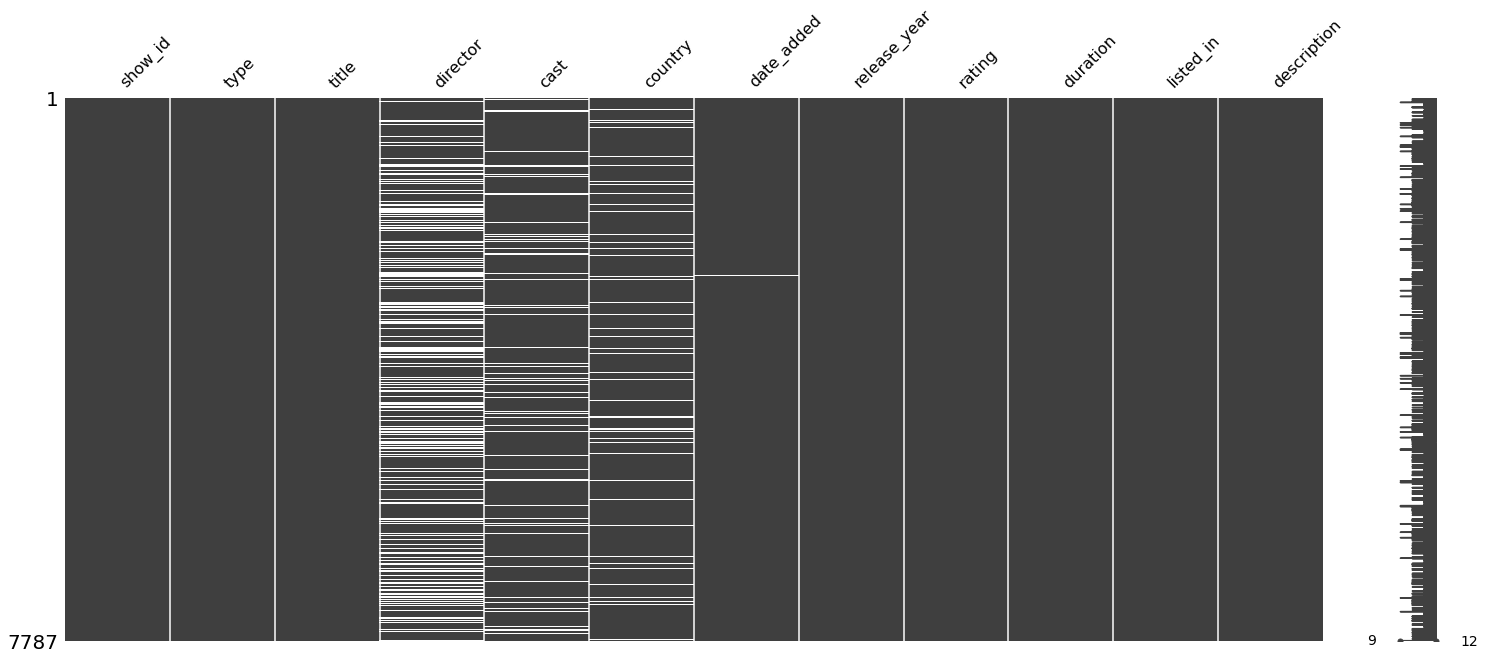

In [17]:
import missingno as mno 
mno.matrix(netflix_df)

In [22]:
clean_df = netflix_df.drop(['show_id','director','cast'],axis = 1)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   country       7280 non-null   object
 3   date_added    7777 non-null   object
 4   release_year  7787 non-null   int64 
 5   rating        7780 non-null   object
 6   duration      7787 non-null   object
 7   listed_in     7787 non-null   object
 8   description   7787 non-null   object
dtypes: int64(1), object(8)
memory usage: 547.6+ KB


In [23]:
clean_df['year']= pd.DatetimeIndex(clean_df['date_added']).year.fillna(2009).astype('object')

In [26]:
movies = clean_df.loc[clean_df.type == 'Movie']

In [27]:
tv_shows = clean_df.loc[clean_df.type == 'TV Show']

In [28]:
tv_country = tv_shows['country'].value_counts()[tv_shows['country'].value_counts(normalize = True)> 0.005]
tv_country_list = list(tv_country.index)

In [29]:
tv_country

United States                    705
United Kingdom                   204
Japan                            157
South Korea                      147
India                             71
Taiwan                            68
Canada                            59
Australia                         46
France                            46
Spain                             45
China                             36
Mexico                            35
Turkey                            27
Brazil                            26
Thailand                          22
United States, Canada             22
Colombia                          20
Germany                           19
Singapore                         17
Argentina                         16
Russia                            15
Canada, United States             13
United Kingdom, United States     12
Italy                             12
Egypt                             12
Name: country, dtype: int64

<function matplotlib.pyplot.show>

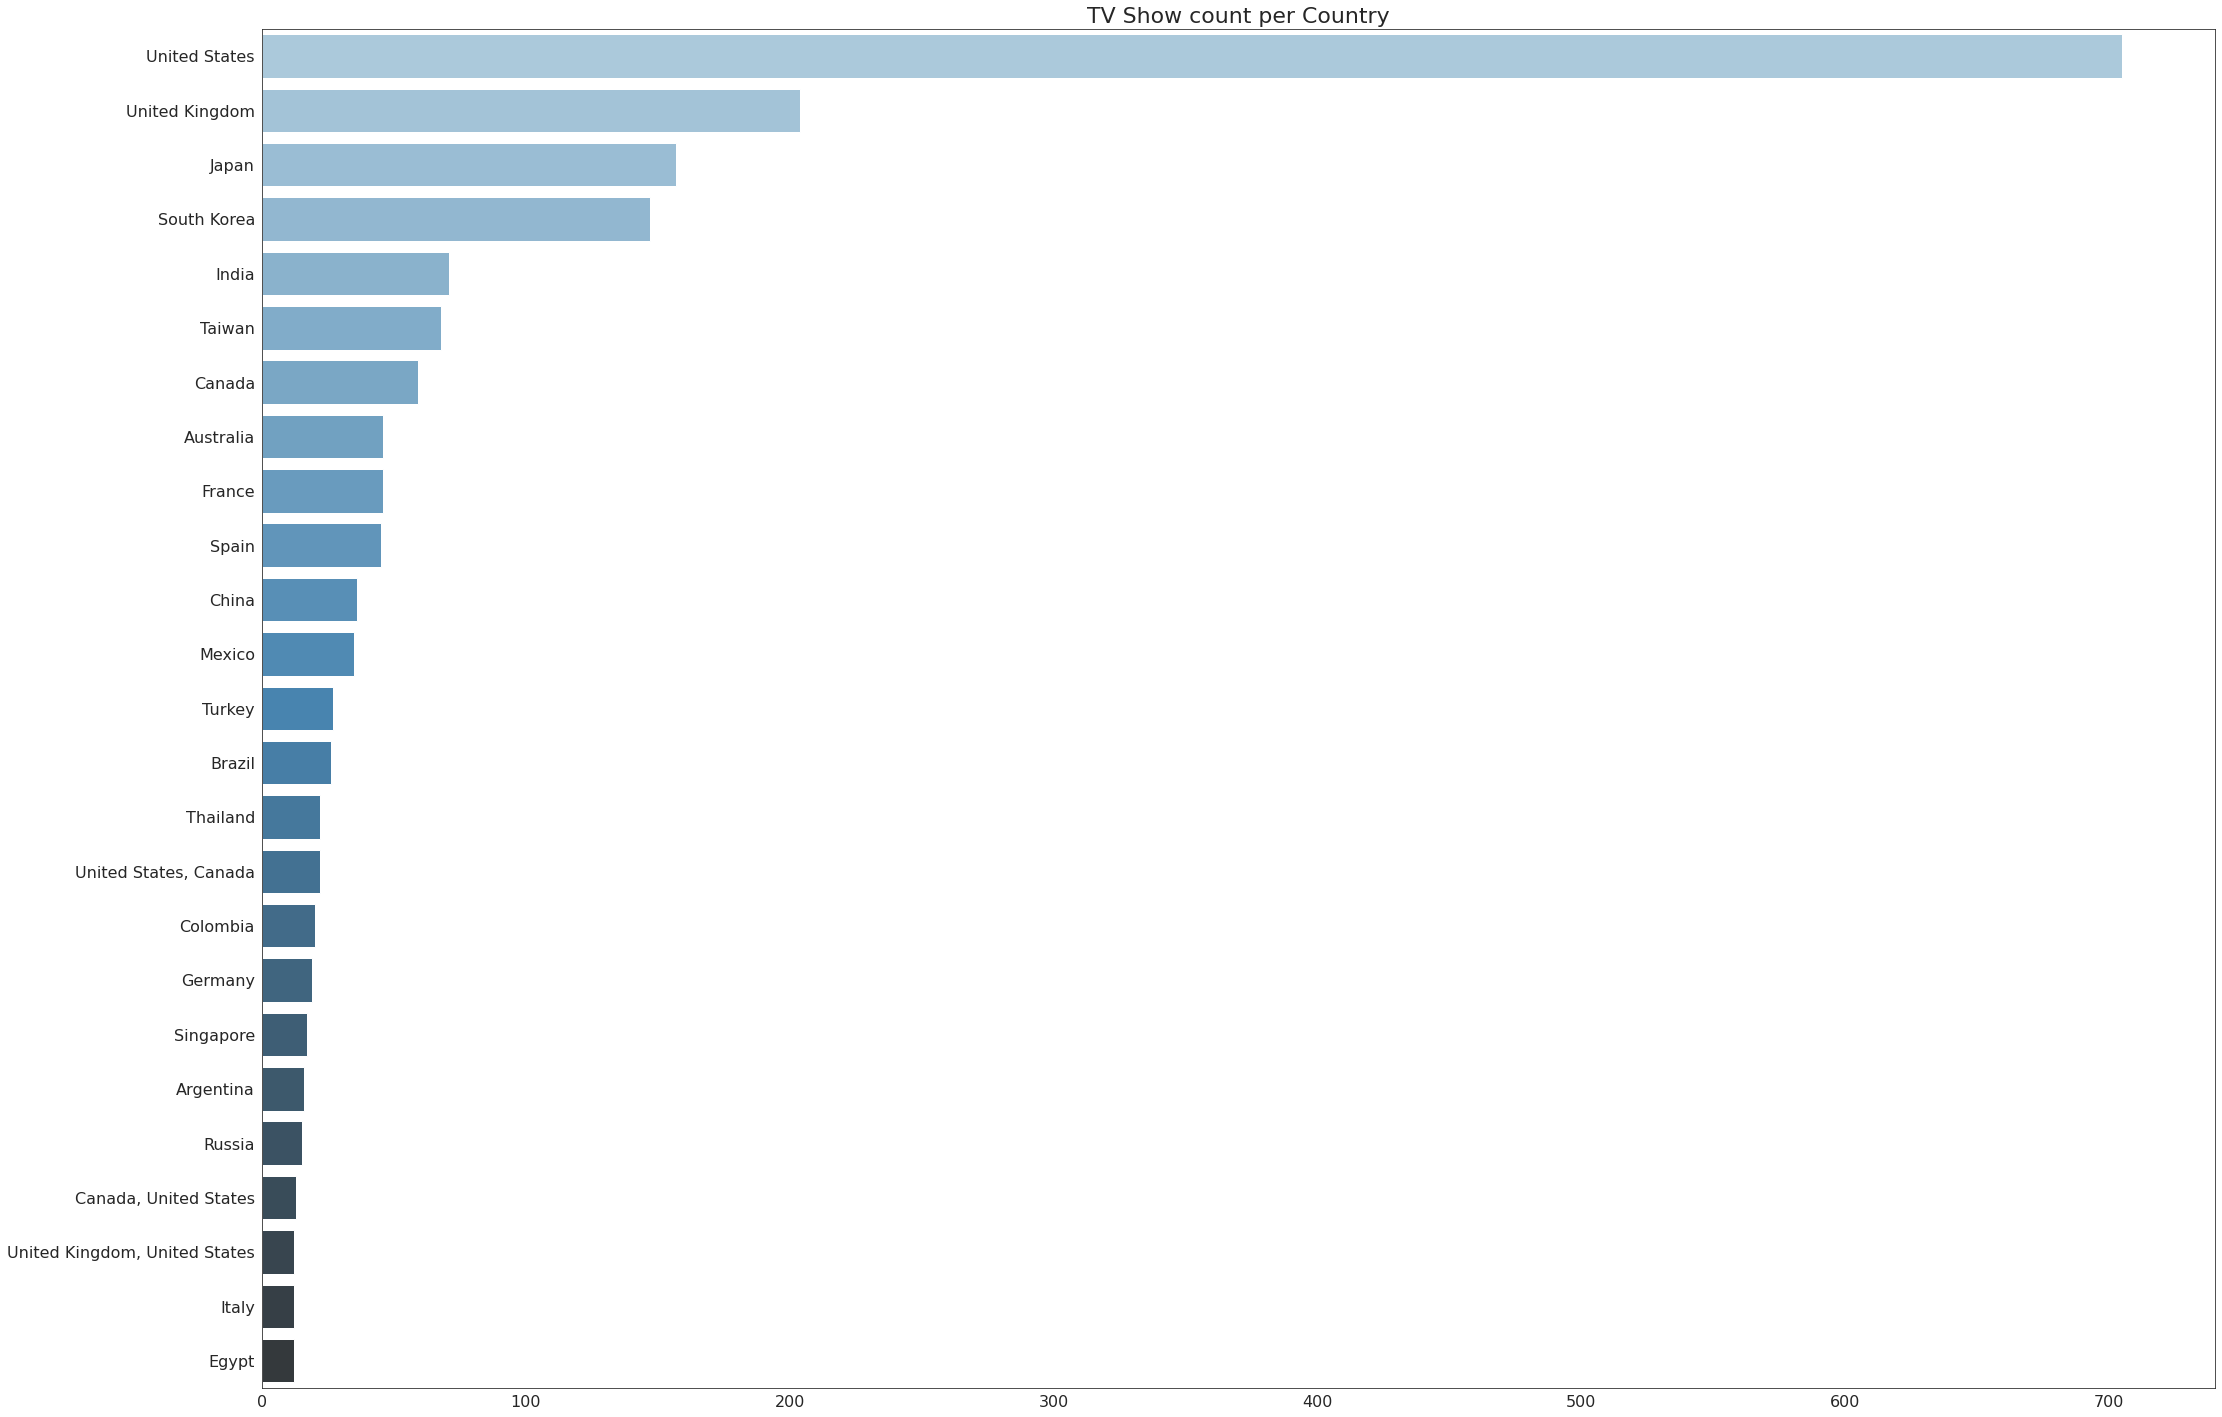

In [37]:
plt.figure(figsize = (35,25))
plt.title('TV Show count per Country', fontsize=22)
plt.tick_params(labelsize = 16)
sb.barplot(y = tv_country.index, x = tv_country.values, palette='Blues_d')
sb.set_style('whitegrid')

plt.show

In [35]:
movie_country = movies['country'].value_counts()[movies['country'].value_counts(normalize=True)>0.005]
movie_country_list = list(movie_country.index)

<function matplotlib.pyplot.show>

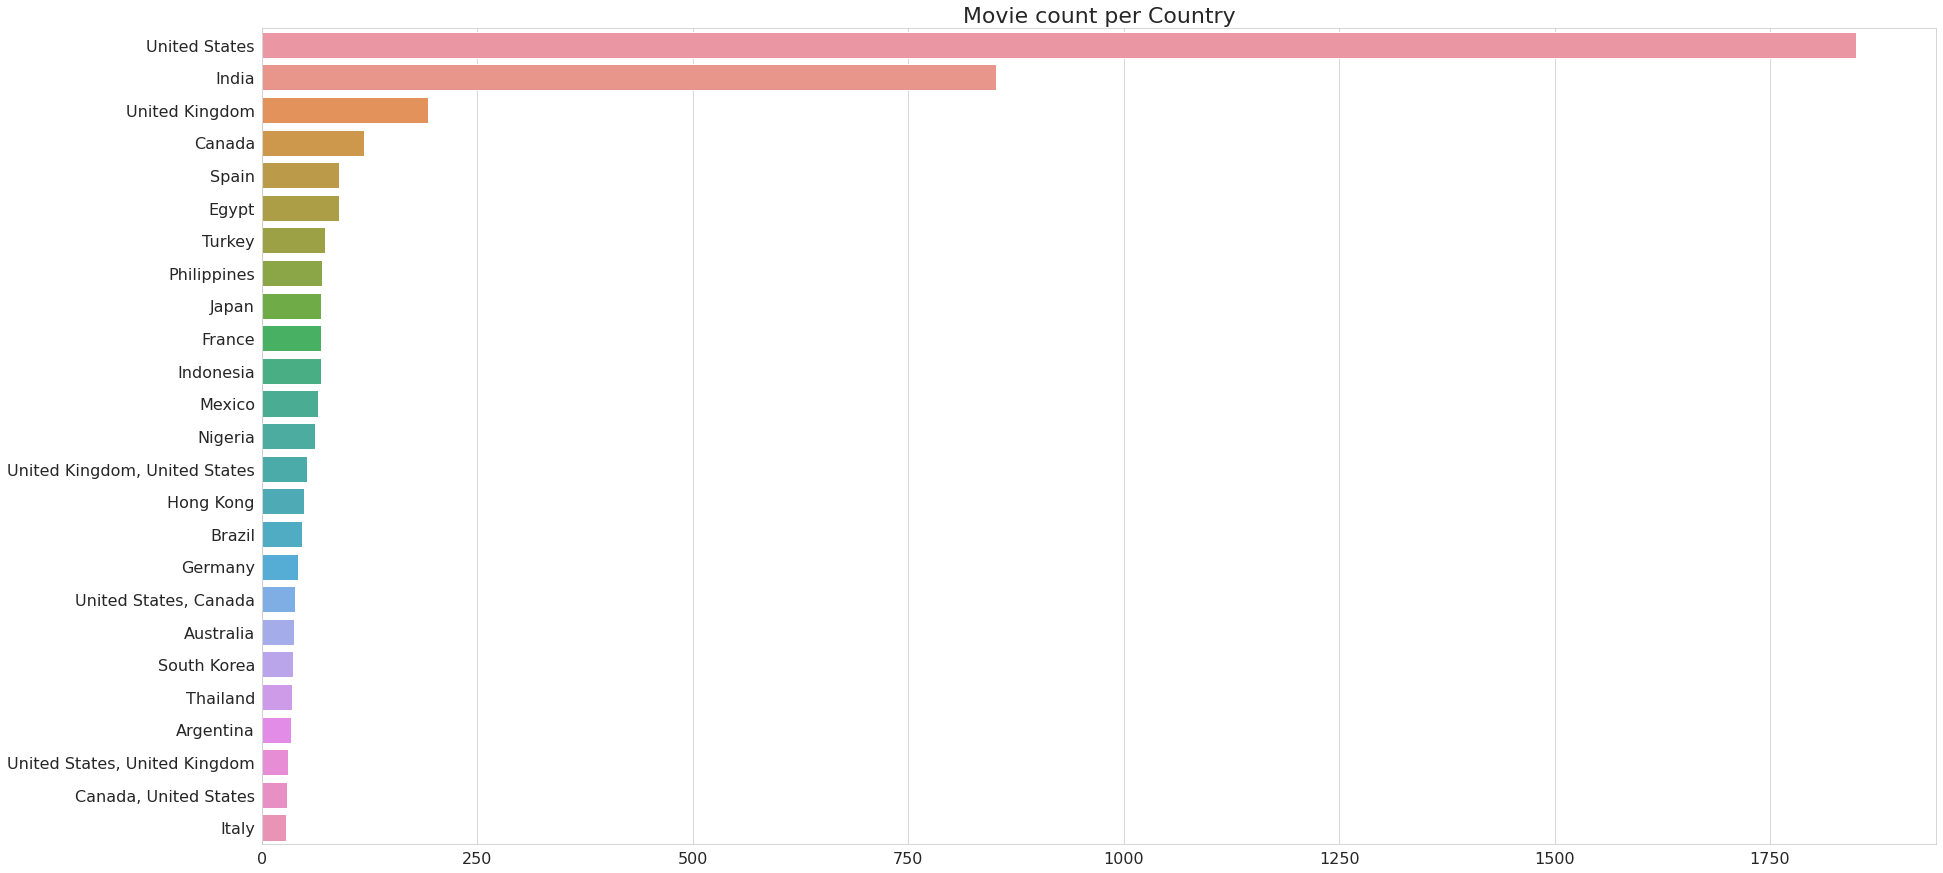

In [36]:
plt.figure(figsize = (30,15))
plt.title('Movie count per Country', fontsize=22)
plt.tick_params(labelsize = 16)
sb.barplot(y = movie_country.index, x = movie_country.values)
sb.set_style('white')
plt.show

In [38]:
tvrelease_year = tv_shows['release_year'].value_counts().sort_index()

In [39]:
movierelease_year = movies['release_year'].value_counts().sort_index()

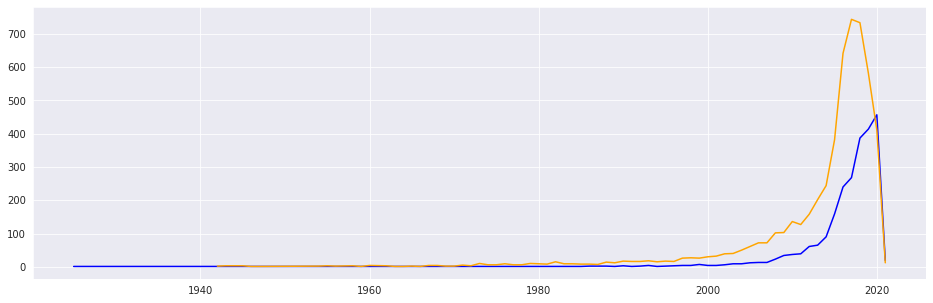

In [40]:
plt.figure(figsize = (16, 5))
sb.set_style('darkgrid')
plt.plot(tvrelease_year.index, tvrelease_year.values, color = 'b', label = 'TV Shows')
plt.plot(movierelease_year.index, movierelease_year.values, color = 'orange', label = 'Movies')

In [47]:
tv_added = tv_shows['year'].value_counts().sort_index()
movie_added = movies['year'].value_counts().sort_index()


<function matplotlib.pyplot.show>

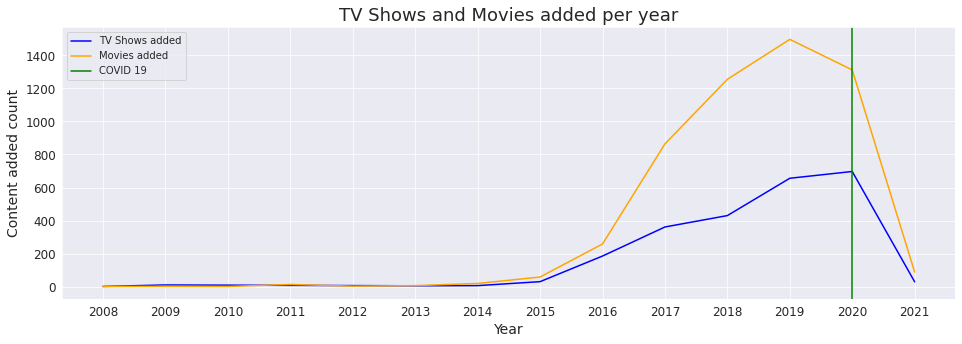

In [50]:
plt.figure(figsize = (16, 5))
sb.set_style('darkgrid')
plt.plot(tv_added.index, tv_added.values, color = 'b', label = 'TV Shows added')
plt.plot(movie_added.index, movie_added.values, color = 'orange', label = 'Movies added')

plt.axvline(x = 2020, color = 'green', label = 'COVID 19')

plt.xticks(list(range(2008, 2022, 1)), fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('TV Shows and Movies added per year', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Content added count', fontsize = 14)
plt.legend()
plt.show

# Conclusion

* this study displays the variations that has occured over the past 10 years 
in the domain of movies and Tv shows.
* With the help of the countplots and bar plots we can visualise the movies and Tv shows that were listed the netflix dataset.
* the graph shows that USA has the highest number of movies and Tv shows available on netflix with more than 1900 movies and 700 Tv shows.
* We can also see that  in terms of adding new movies and tv shows  thier is a substantial growth after the year 2014.
* The graph also shows a prominant decrease after the year 2020, which is the result of covid 19 Pandemic.

